Importing the needed libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

Loading the cat non cat dataset file


In [2]:
def load_dataset():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat' picture.


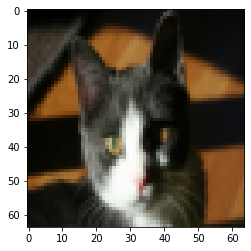

In [4]:
# Example of a picture
index = np.random.randint(17, 34)
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [6]:
training_ex = train_set_x_orig.shape[0]
test_ex = test_set_x_orig.shape[0]
pixel_size = train_set_x_orig.shape[1]

In [12]:
print(f"Number of training examples = {training_ex}")
print(f"Number of testing examples = {test_ex}")
print(f"Height to width is {pixel_size}")
print(f"Each image is of ({pixel_size}, {pixel_size}, 3) structure")
print(f"trai_x shape = {train_set_x_orig.shape}")
print(f"Test_x shape = {test_set_x_orig.shape}")
print(f"Train_y shape = {train_set_y.shape}")
print(f"test_y shape = {test_set_y.shape}")

Number of training examples = 209
Number of testing examples = 50
Height to width is 64
Each image is of (64, 64, 3) structure
trai_x shape = (209, 64, 64, 3)
Test_x shape = (50, 64, 64, 3)
Train_y shape = (1, 209)
test_y shape = (1, 50)


In [13]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten =  test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

In [15]:
print(f"Number of training examples = {training_ex}")
print(f"Number of testing examples = {test_ex}")
print(f"Height to width is {pixel_size}")
print(f"Each image is of ({pixel_size}, {pixel_size}, 3) structure")
print(f"trai_x shape = {train_set_x_flatten.shape}")
print(f"Test_x shape = {test_set_x_flatten.shape}")
print(f"Train_y shape = {train_set_y.shape}")
print(f"test_y shape = {test_set_y.shape}")

Number of training examples = 209
Number of testing examples = 50
Height to width is 64
Each image is of (64, 64, 3) structure
trai_x shape = (12288, 209)
Test_x shape = (12288, 50)
Train_y shape = (1, 209)
test_y shape = (1, 50)


Standardizing the dataset

In [16]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

Defining the sigmoid function

In [17]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [ ]:
# Initializing parameters
def initialize(dimen):
    weight = np.zeros((dimen, 1))
    bias = 0.0

    return weight, bias

First forward and backward propagation of the network

In [27]:
def forward(X, y, weight, bias):
    examples = X.shape[1]
    prop = sigmoid(np.dot(weight.T, X) +bias)
    
    cost = -(np.sum(y * (np.log(prop)) + (1-y) * (np.log(1-prop))))/examples

    # Backward prop finding gradients(derivatives)

    dz = (prop - y)/ examples
    dw = np.dot(X, dz.T)
    db = np.sum(dz)

    cost = np.squeeze(cost)

    gradients = {
        "dweight": dw,
        "dbias" : db, 
    }

    return cost, gradients

In [ ]:
# Optimization and running more iterations

def optimize(X, y, weights, bias, num_iter, lr, print_cost=False):
    costs = []

    for _ in range(num_iter):
        cost, grads = forward(X, y, weights, bias)

        db = grads['dbias']
        dw = grads['dweight']

        # update weights and bias
        bias = bias - (lr * db)
        weights = weights - (lr * dw)




